# **Unemployment in India during COVID-19**

Objective of Analysis:
The objective of this analysis is to understand the impact of COVID-19 on the job market in India. We will use a dataset containing the unemployment rate of all the states in India. The dataset includes information such as States, Date, Frequency, Estimated Unemployment Rate (%), Estimated Employed, and Estimated Labour Participation Rate (%).

### **This dataset contains the unemployment rate of all the states in India**

States = states in India
Date = date which the unemployment rate observed
Frequency = measuring frequency (Monthly)
Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India
Estimated Employed = Number of people employed
Estimated Labour Participation Rate (%) = The labour force participation rate is the portion of the working population in the 16-64 years' age group in the economy currently in employment or seeking employment.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Importing the Data





In [2]:
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

#### Formatting the Dataframe

In [6]:
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Frequency'] = df['Frequency'].astype('category')
df['Month'] = df['Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x: int(x))
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df['Region'] = df['Region'].astype('category')
df.drop(columns='Month', inplace=True)

In [7]:
df.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


#### Exploratory Data Analysis

In [8]:
# Basic Statistics

df_stats = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(df_stats.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [9]:
# Statistics by Region

region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats, 2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


<Axes: >

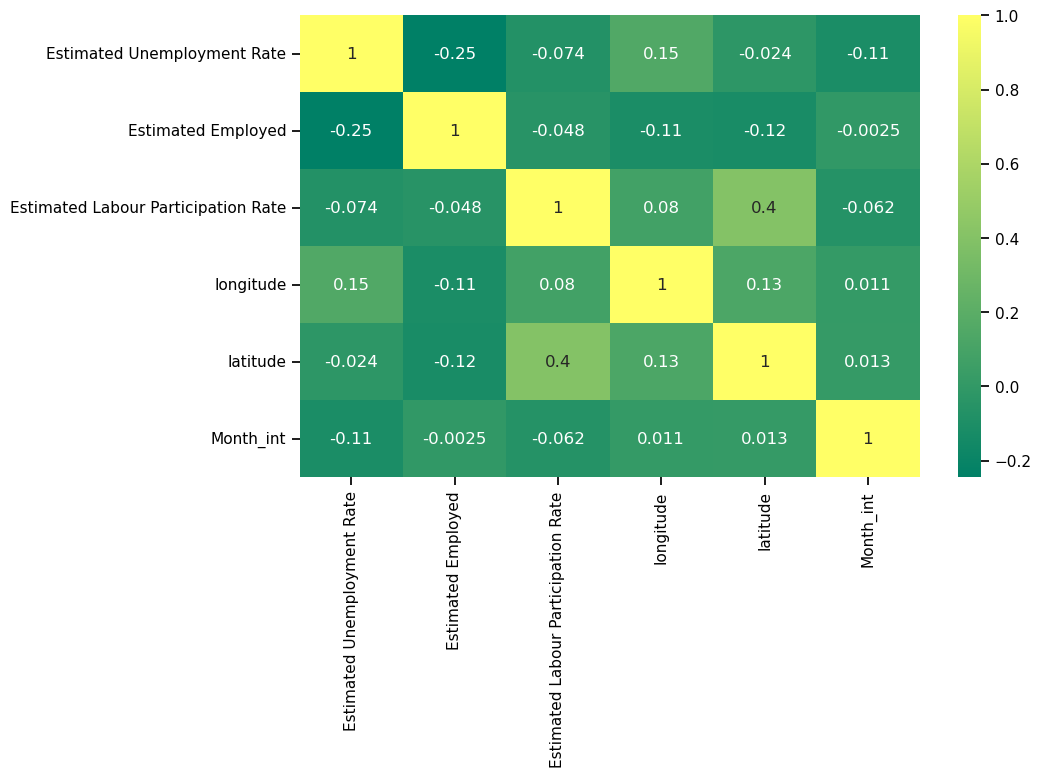

In [10]:
# Correlation Heatmap

heat_maps = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(10, 6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer')

In [11]:
# Box plot of Unemployment Rate by State

fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate', template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [12]:
# Scatter matrix

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'],
                        color='Region')
fig.show()

In [13]:
# Bar plot of average Unemployment Rate by State

plot_ump = df[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate', color='States',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [14]:
# Animated bar plot of Unemployment rate across region from Jan.2020 to Oct.2020

fig = px.bar(df, x='Region', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

In [15]:
# Sunburst chart showing unemployment rate in each region and state

unemplo_df = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
unemplo = unemplo_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['Region', 'States'], values='Estimated Unemployment Rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()

### Impact of Lockdown on States Estimated Employed
* On 24 March 2020, the Government of India under Prime Minister Narendra Modi ordered a nationwide lockdown for 21 days

In [16]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [17]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
g_lock.head(2)


,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250


In [18]:
# percentage change in unemployment rate

g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)
plot_per = g_lock.sort_values('percentage change in unemployment')

In [19]:
# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')
fig.show()


### Most impacted States/Union Territories

* Puducherry
* Jharkhand
* Bihar
* Haryana
* Tripura


In [20]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x


In [21]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))

In [22]:
fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)


fig.show()